* p is the number of lagged values that need to be added or subtracted from the values (label column). It captures the autoregressive part of ARIMA.
* d represents the number of times the data needs to differentiate to produce a stationary signal. If it’s stationary data, the value of d should be 0, and if it’s seasonal data, the value of d should be 1. d captures the integrated part of ARIMA.
* q is the number of lagged values for the error term added or subtracted from the values (label column). It captures the moving average part of ARIMA.

Now let’s start with the task of Time Series Forecasting with ARIMA. I will first collect Google stock price data using the Yahoo Finance API. If you have never used Yahoo Finance API

As machine learning practitioners, we need to collect stock price data for regression analysis and time series analysis. We can easily download it from Yahoo Finance. But imagine if we want to create an application where we can analyze the real-time stock prices, we need to collect the latest dataset instead of using the downloaded dataset. Learn more from https://thecleverprogrammer.com/2021/12/21/get-stock-price-data-using-python/


Yahoo Finance is one of the most popular websites to collect stock price data. You need to visit the website, enter the company’s name or stock symbol, and you can easily download the dataset. But if you want to get the latest dataset every time you are running your code, you need to use the yfinance API. yfinance is an API provided by Yahoo Finance to collect the latest stock price data.

To use this API, you need to install it by using the pip command in your terminal or command prompt as mentioned below:

In [ ]:
!pip install yfinance

In [49]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta
today = date.today()

d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=365)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

data = yf.download('GOOG', 
                      start=start_date, 
                      end=end_date, 
                      progress=False)



In [50]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-08-29,132.998001,137.294998,132.979996,135.490005,135.335999,30803300
2023-08-30,135.570007,137.250000,135.020996,136.929993,136.774353,21773400
2023-08-31,137.050003,138.399994,136.820007,137.350006,137.193878,28147900
2023-09-01,138.429993,138.580002,135.940002,136.800003,136.644501,16665700
2023-09-05,136.440002,137.369995,135.559998,136.710007,136.554611,17730200
...,...,...,...,...,...,...
2024-08-21,166.990005,168.639999,166.570007,167.630005,167.630005,15269600
2024-08-22,169.039993,169.419998,165.029999,165.490005,165.490005,19123800
2024-08-23,166.550003,167.949997,165.660004,167.429993,167.429993,14281600


In [51]:
data["Date"] = data.index
data = data[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace=True)
print(data.tail())

          Date        Open        High         Low       Close   Adj Close  \
246 2024-08-21  166.990005  168.639999  166.570007  167.630005  167.630005   
247 2024-08-22  169.039993  169.419998  165.029999  165.490005  165.490005   
248 2024-08-23  166.550003  167.949997  165.660004  167.429993  167.429993   
249 2024-08-26  168.154999  169.380005  166.320007  167.929993  167.929993   
250 2024-08-27  167.610001  168.244995  166.160004  166.380005  166.380005   

       Volume  
246  15269600  
247  19123800  
248  14281600  
249  11990300  
250  13701500  


In [53]:
data = data[["Date","Close"]]
print(data.head())

        Date       Close
0 2023-08-29  135.490005
1 2023-08-30  136.929993
2 2023-08-31  137.350006
3 2023-09-01  136.800003
4 2023-09-05  136.710007


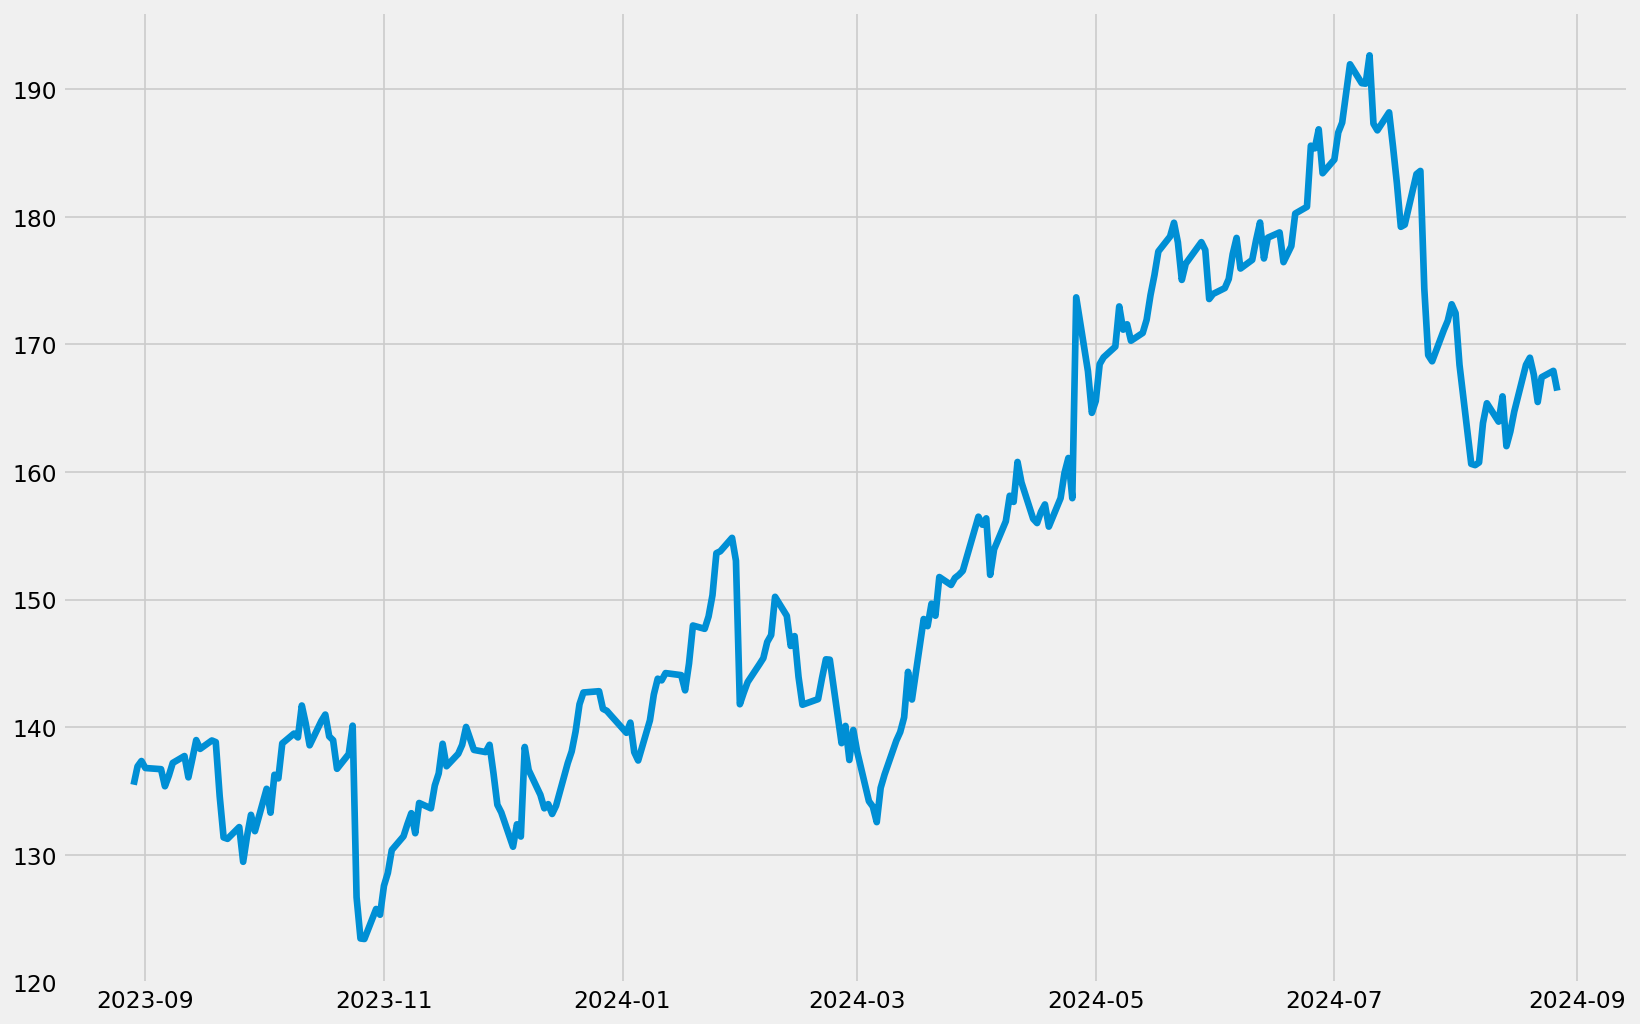

In [54]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.plot(data["Date"], data["Close"])

Before using the ARIMA model, we have to figure out whether our data is stationary or seasonal. The data visualization graph about the closing stock prices above shows that our dataset is not stationary. To check whether our dataset is stationary or seasonal properly, we can use the seasonal decomposition method that splits the time series data into trend, seasonal, and residuals for a better understanding of the time series data:

In [57]:
from statsmodels.tsa.seasonal import seasonal_decompose

series = data.Close
result = seasonal_decompose(series, 
                            model='multiplicative')
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 10)

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

In [58]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

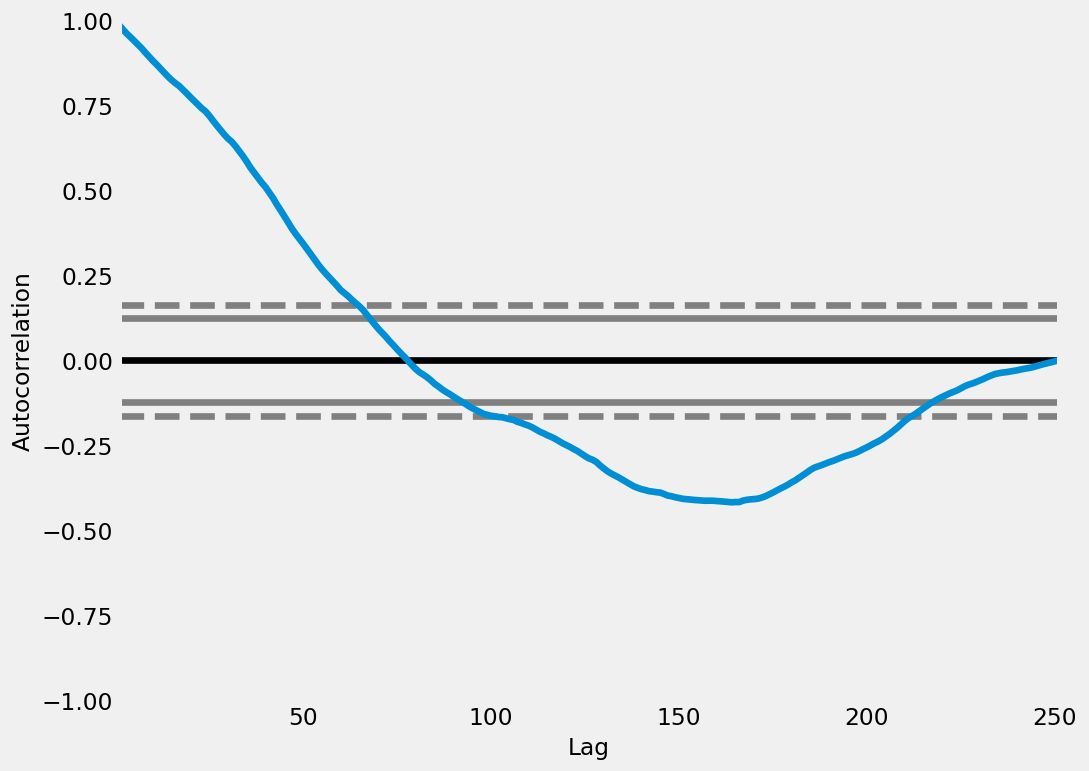

In [59]:
pd.plotting.autocorrelation_plot(data["Close"])

/Users/reelenaq/anaconda3/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


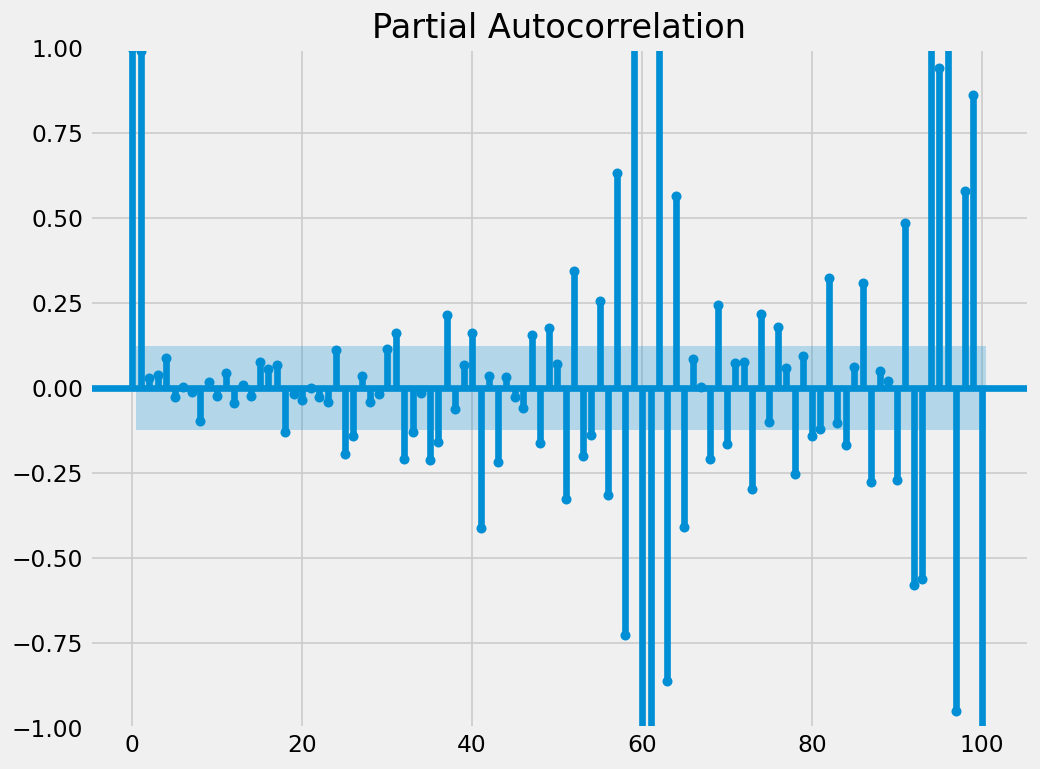

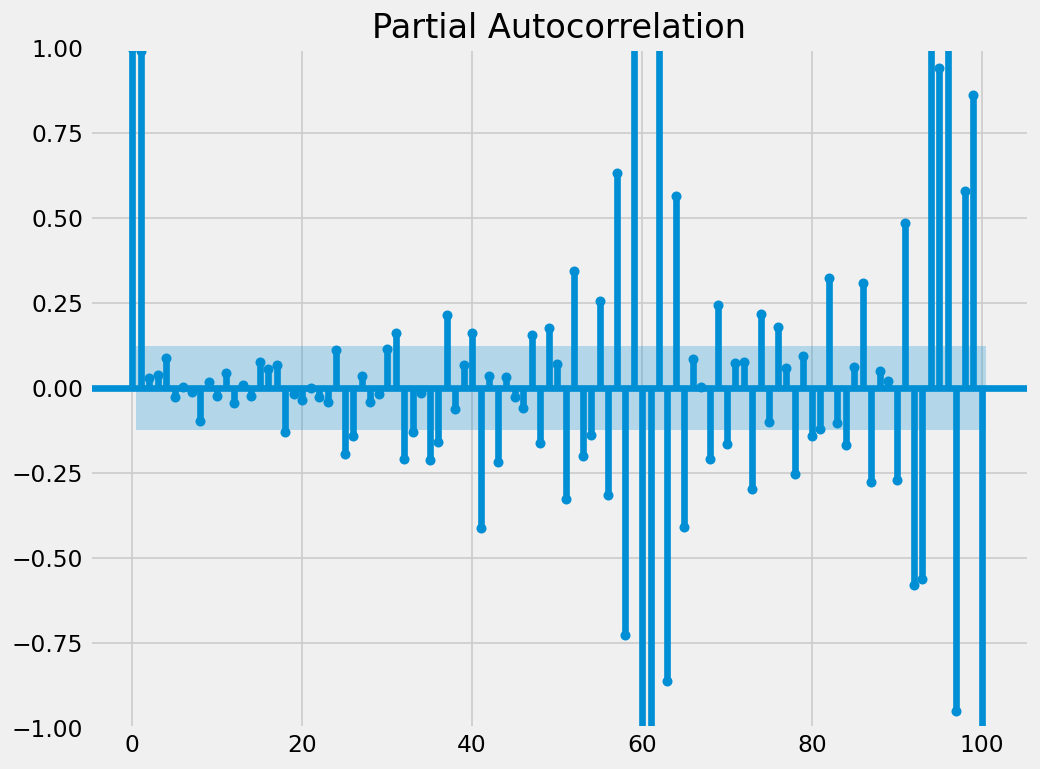

In [60]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data["Close"], lags = 100)

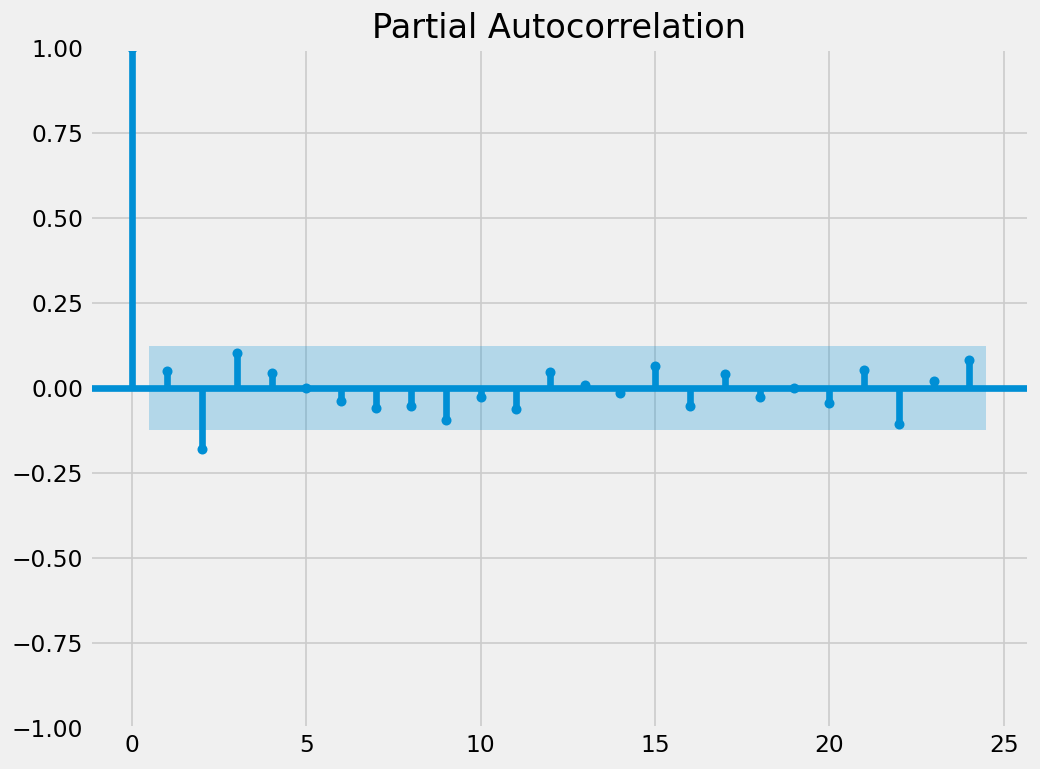

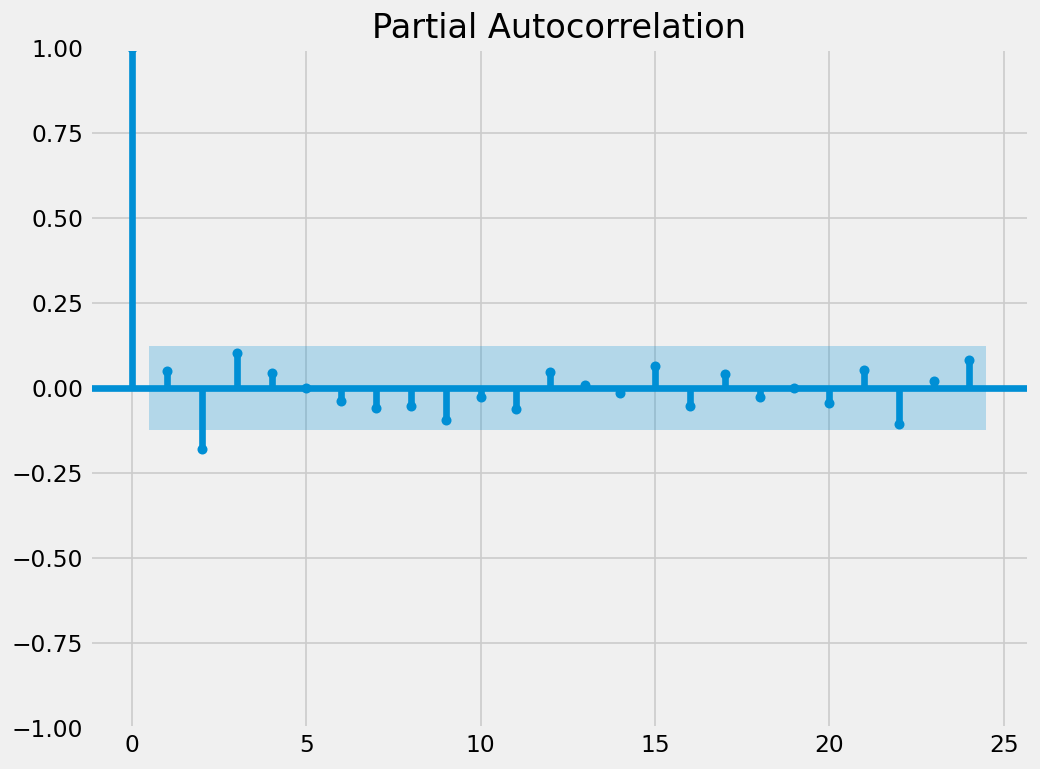

In [46]:
plot_pacf(data.Close.diff().dropna())
# plot_pacf(data["Close"])

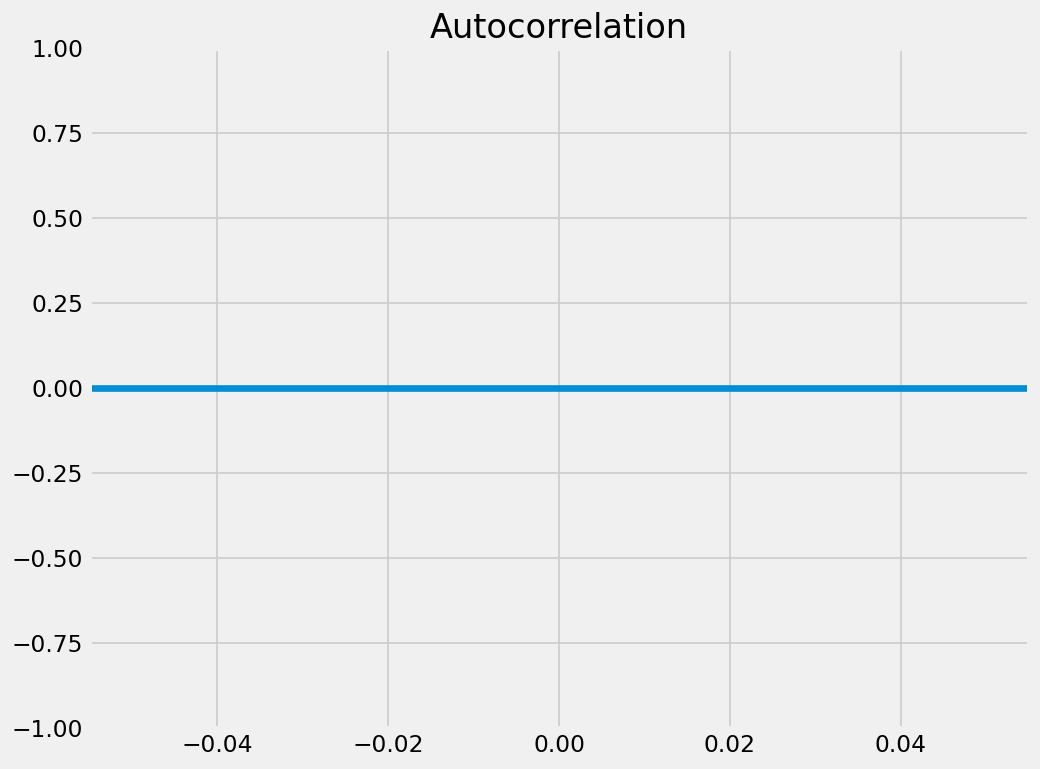

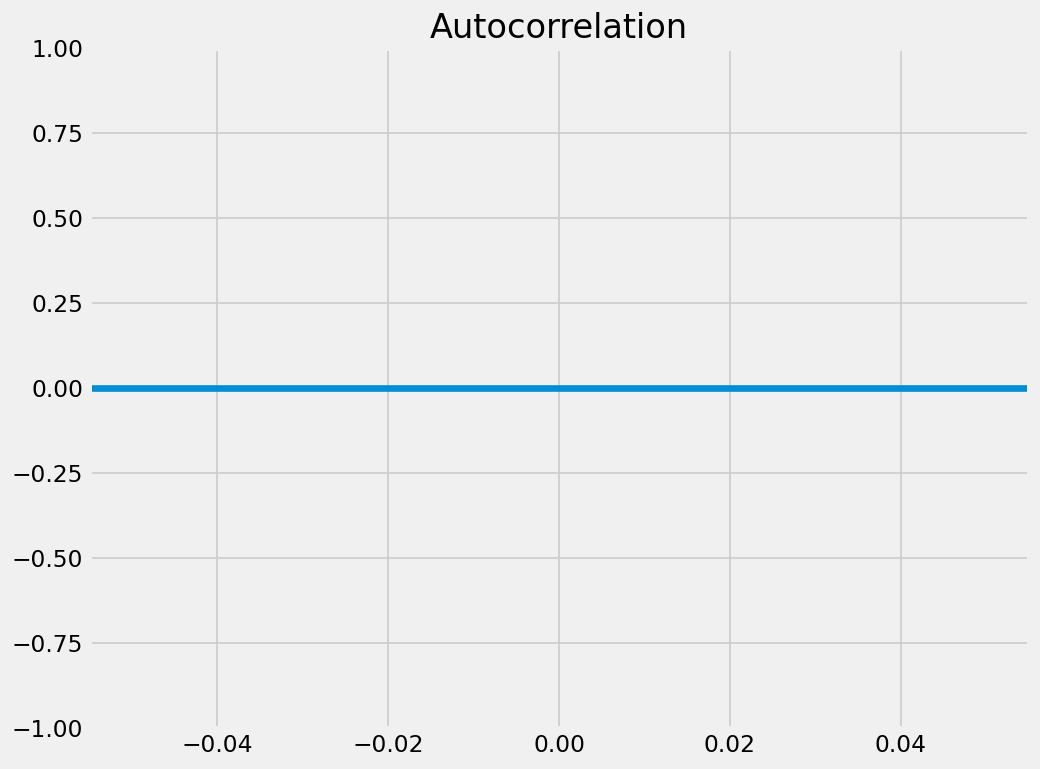

In [47]:
plot_acf(data['Close'].diff())

In [28]:
from statsmodels.tsa.stattools import adfuller 
result = adfuller(data['Close'])

In [30]:
print('ADF Statistic: %f' % result[0]) 
print('p-value: %f' % result[1]) 
print('Critical Values:') 
for key, value in result[4].items(): print('\t%s: %.3f' % (key, value))
    
# p value is more than 0.05, that means our null hypothesis will be rejected and we should takt this series as non-stationary

ADF Statistic: -1.334935
p-value: 0.613042
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573


In [12]:
data=data.set_index('Date')

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

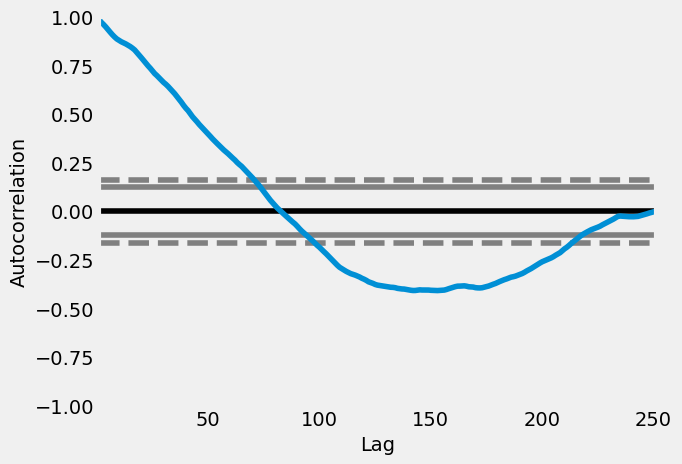

In [27]:
pd.plotting.autocorrelation_plot(data["Close"])

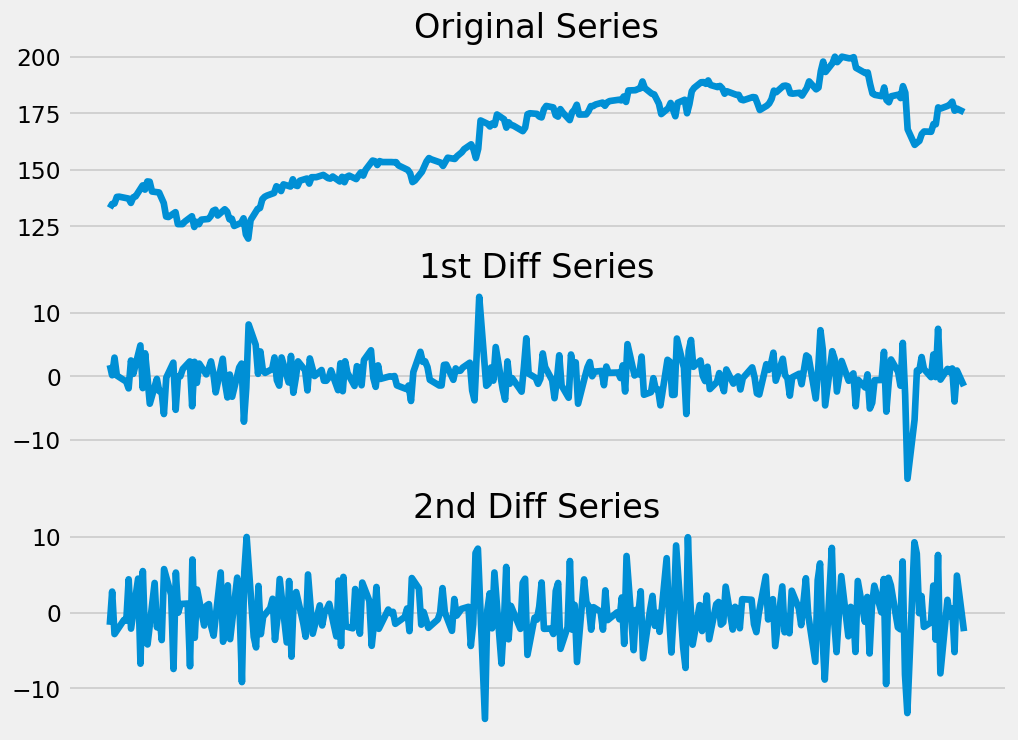

In [32]:
import numpy as np
plt.rcParams.update({'figure.figsize':(9,7),
                    'figure.dpi':120})

fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(data.Close);ax1.set_title('Original Series'); ax1.axes.xaxis.set_visible(False)

ax2.plot(data.Close.diff()); ax2.set_title('1st Diff Series'); ax2.axes.xaxis.set_visible(False)

ax3.plot(data.Close.diff().diff()); ax3.set_title('2nd Diff Series'); ax3.axes.xaxis.set_visible(False)
